<div align="center">

#### Lab 3

# National Tsing Hua University

#### Spring 2025

#### 11320IEEM 513600

#### Deep Learning and Industrial Applications
    
## Lab 3: Anomaly Detection in Industrial Applications

</div>

### Introduction

In today's industrial landscape, the ability to detect anomalies in manufacturing processes and products is critical for maintaining quality, efficiency, and safety. This lab focuses on leveraging deep learning techniques for anomaly detection in various industrial applications, using the MVTEC Anomaly Detection Dataset. By employing ImageNet-pretrained models available in torchvision, students will gain hands-on experience in classfying defects and irregularities across different types of industrial products.

Throughout this lab, you'll be involved in the following key activities:
- Explore and process the MVTec Anomaly Detection Dataset.
- Apply ImageNet-pretrained models from [Torchvision](https://pytorch.org/vision/stable/models.html) to detect anomalies in industrial products.
- Evaluate the performance of the models to understand their effectiveness in real-world industrial applications.

### Objectives

- Understand the principles of anomaly detection in the context of industrial applications.
- Learn how to implement and utilize ImageNet-pretrained models for detecting anomalies.
- Analyze and interpret the results of the anomaly detection models to assess their practicality in industrial settings.

### Dataset

The MVTec AD Dataset is a comprehensive collection of high-resolution images across different categories of industrial products, such as bottles, cables, and metal nuts, each with various types of defects. This dataset is pivotal for developing and benchmarking anomaly detection algorithms. You can download our lab's dataset [here](https://drive.google.com/file/d/19600hUOpx0hl78TdpdH0oyy-gGTk_F_o/view?usp=share_link). You can drop downloaded data and drop to colab, or you can put into yor google drive.

### References
- [MVTec AD Dataset](https://www.kaggle.com/datasets/ipythonx/mvtec-ad/data) for the dataset used in this lab.
- [Torchvision Models](https://pytorch.org/vision/stable/models.html) for accessing ImageNet-pretrained models to be used in anomaly detection tasks.
- [State-of-the-Art Anomaly Detection on MVTec AD](https://paperswithcode.com/sota/anomaly-detection-on-mvtec-ad) for insights into the latest benchmarks and methodologies in anomaly detection applied to the MVTec AD dataset.
- [CVPR 2019: MVTec AD — A Comprehensive Real-World Dataset for Unsupervised Anomaly Detection] for the original paper of MVTec AD dataset.

Mounted at /content/drive


讀取影像中:   0%|          | 0/79 [00:00<?, ?it/s]

總共讀取 79 張影像，陣列形狀: (79, 1024, 1024, 3)
Unique classes: ['color', 'combined', 'good', 'hole', 'liquid', 'scratch']


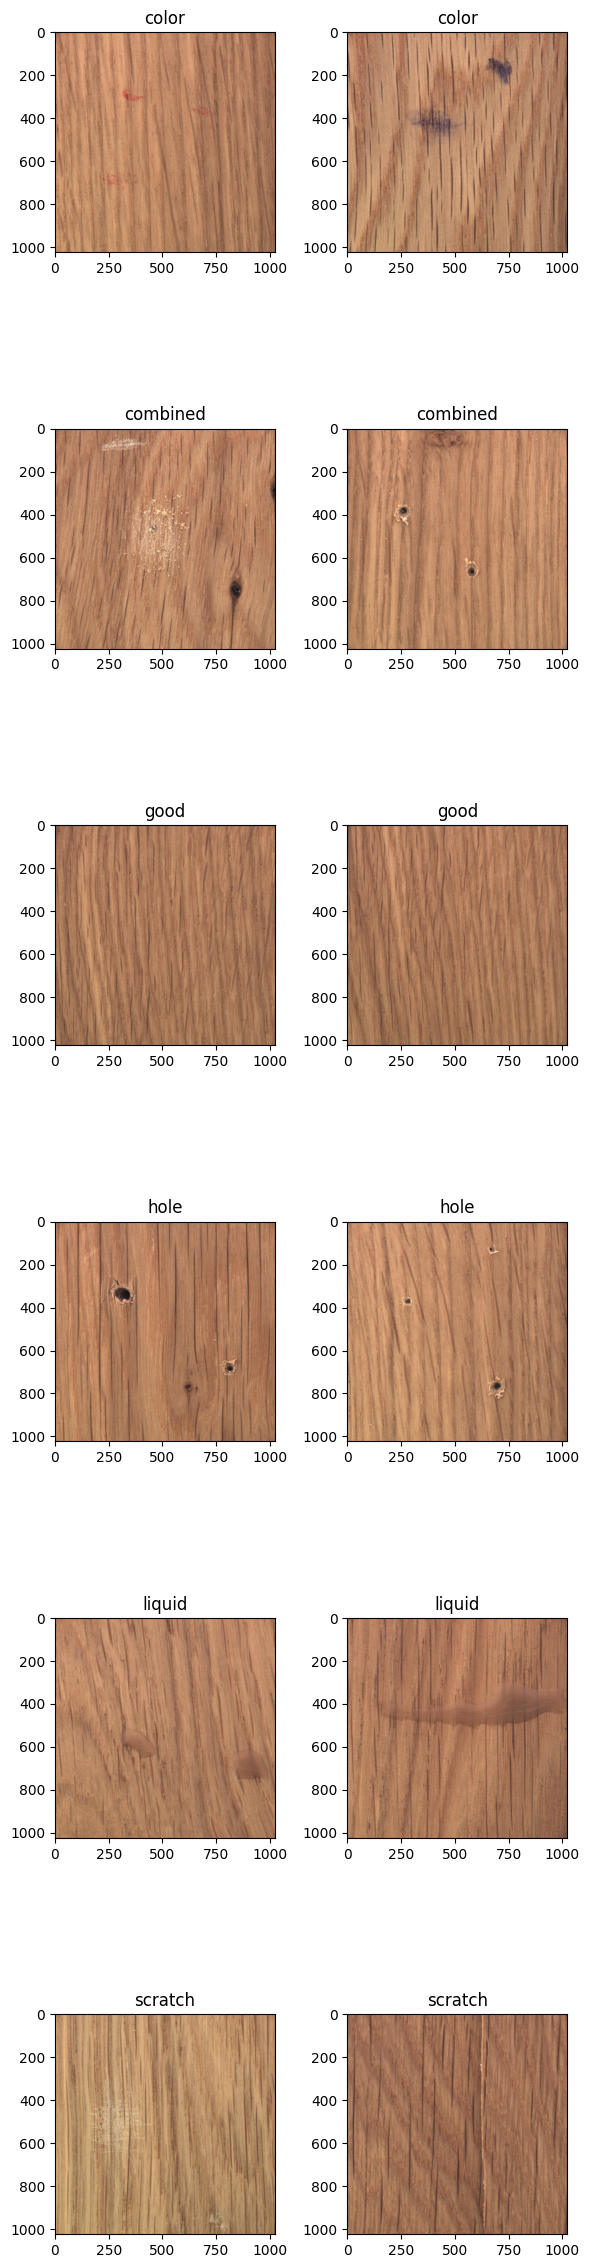

In [ ]:
import glob
import os
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import cv2
import numpy as np
from google.colab import drive

# 掛載 Google Drive
drive.mount('/content/drive')

# 指定要處理的 split 資料夾：請依照需要修改成 'train', 'test' 或 'ground_truth'
split = 'test'

# 取得完整的圖片路徑，假設圖片結構為:
# /content/drive/MyDrive/wood/<split>/<class>/*.png
file_paths = sorted(glob.glob(f'/content/drive/MyDrive/wood/{split}/*/*.png'))
if not file_paths:
    raise ValueError("找不到圖片，請檢查路徑設定及資料夾結構。")

# 初始化影像資料和對應的類別列表
all_data = []
class_names = []

# 逐一讀取影像，同時取得影像的類別（子資料夾名稱）
for img_path in tqdm(file_paths, desc="讀取影像中"):
    img = cv2.imread(img_path)
    if img is None:
        print(f"無法讀取影像: {img_path}")
        continue
    # 轉換 BGR 到 RGB
    img = img[..., ::-1]
    all_data.append(img)
    # 取得類別名稱：取路徑中最後一層資料夾的名稱
    class_name = os.path.basename(os.path.dirname(img_path))
    class_names.append(class_name)

# 若沒有讀到影像，則終止
if len(all_data) == 0:
    raise ValueError("沒有任何影像被讀取，請檢查路徑設定。")

# 將列表轉換成 numpy 陣列
all_data = np.array(all_data)
print(f"總共讀取 {len(all_data)} 張影像，陣列形狀: {all_data.shape}")
print(f"Unique classes: {sorted(set(class_names))}")

# 根據類別將影像分組，這裡示範每個類別顯示前兩張影像
unique_classes = sorted(set(class_names))
images_per_class = {}
for class_name in unique_classes:
    # 找出對應這個類別的所有影像索引
    indices = [i for i, cn in enumerate(class_names) if cn == class_name]
    # 儲存前兩張影像（若不足兩張則儲存全部）
    images_per_class[class_name] = [all_data[i] for i in indices[:2]]

# 建立子圖來展示每個類別的影像
num_classes = len(unique_classes)
# 這邊以每個類別顯示2張影像作為範例，如果某個類別影像不足2張，會依照實際數量展示
fig, axs = plt.subplots(num_classes, 2, figsize=(6, 4 * num_classes))
for i, class_name in enumerate(unique_classes):
    imgs = images_per_class[class_name]
    for j in range(2):
        ax = axs[i, j] if num_classes > 1 else axs[j]
        if j < len(imgs):
            ax.imshow(imgs[j])
            ax.set_title(f"{class_name}")
        else:
            # 若該類別影像不足2張，隱藏空白區域
            ax.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
import glob
import os
import cv2

# 定義要統計的資料集分割（資料夾名稱）
splits = ['train', 'test', 'ground_truth']

# 使用字典儲存各 split 的資訊
dataset_info = {}

for split in splits:
    # 假設每個 split 底下皆有多個類別（子資料夾），並用 *.png 取得檔案
    split_paths = sorted(glob.glob(f'/content/drive/MyDrive/wood/{split}/*/*.png'))
    # 取得此 split 所有影像的類別名稱（子資料夾名稱）
    split_classes = sorted(set([os.path.basename(os.path.dirname(p)) for p in split_paths]))

    dataset_info[split] = {
        'file_paths': split_paths,
        'num_images': len(split_paths),
        'classes': split_classes
    }

# 取得整個資料集（所有 splits）的影像總數
total_images = sum([dataset_info[split]['num_images'] for split in splits])

# 取得所有 defect 類別（聯集：不同 split 中的類別可能不完全相同）
all_classes = sorted(set(cls for split in splits for cls in dataset_info[split]['classes']))
num_defect_classes = len(all_classes)

# 取樣一張影像以確認影像尺寸（假設所有影像尺寸相同）
sample_dim = None
for split in splits:
    if dataset_info[split]['file_paths']:  # 若該 split 有影像
        sample_img = cv2.imread(dataset_info[split]['file_paths'][0])
        if sample_img is not None:
            sample_dim = sample_img.shape  # (高度, 寬度, 通道數)
            break

# 輸出結果
print("Number of defect classes:", num_defect_classes)
print("Types of defect classes:", all_classes)
print("Number of images used in the dataset:", total_images)
print("\nDistribution of data:")
for split in splits:
    print(f"{split}: {dataset_info[split]['num_images']} images")

if sample_dim is not None:
    print("Image dimensions (height, width, channels):", sample_dim)
else:
    print("無法取得影像尺寸。")


Number of defect classes: 6
Types of defect classes: ['color', 'combined', 'good', 'hole', 'liquid', 'scratch']
Number of images used in the dataset: 386

Distribution of data:
train: 247 images
test: 79 images
ground_truth: 60 images
Image dimensions (height, width, channels): (1024, 1024, 3)


## A. Data Loading and Preprocessing

## B. Defining Neural Networks

In [ ]:
import glob
import os
import cv2
import numpy as np
import torch
from torchvision import transforms, models
from torch.utils.data import DataLoader, Dataset
from PIL import Image
from sklearn.model_selection import train_test_split

# 取得整個資料集所有影像的完整路徑
# 使用 glob 搜尋 wood 底下所有資料夾的 png 檔案
all_file_paths = sorted(glob.glob('/content/drive/MyDrive/wood/*/*/*.png'))
print("Total file paths found:", len(all_file_paths))  # 根據統計約有 386 張影像

# 讀取所有影像並依據路徑取得 defect class
all_images = []
all_labels = []
for fp in all_file_paths:
    img = cv2.imread(fp)
    if img is None:
        print("Failed to load image:", fp)
        continue
    # 轉成 RGB（cv2 預設讀取為 BGR）
    img = img[..., ::-1]
    all_images.append(img)
    # 假設影像路徑格式：/content/drive/MyDrive/wood/<split>/<defect_class>/<filename>.png
    # 取出 defect class：即為該路徑的倒數第二個資料夾名稱
    defect_class = os.path.basename(os.path.dirname(fp))
    all_labels.append(defect_class)

# 建立 defect class 與 index 的對應（根據統計結果應為 6 個）
classes = sorted(set(all_labels))
print("Defect classes:", classes, "Total:", len(classes))
class_to_idx = {c: i for i, c in enumerate(classes)}

# 將文字標籤轉成數字標籤
y = np.array([class_to_idx[c] for c in all_labels])

# 將影像資料由列表轉為 numpy 陣列，初始 shape 為 (N, height, width, channels)
x = np.array(all_images)
# 轉換成 (N, channels, height, width)
x = np.transpose(x, (0, 3, 1, 2))

print("Shape of x (all images):", x.shape)
print("Shape of y (labels):", y.shape)

# 利用 train_test_split 將所有資料依類別比例分成訓練 (80%) 與驗證 (20%)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of x_val: {x_val.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_val: {y_val.shape}')

# 定義資料擴增與變換 (這裡將影像縮放成 32x32)
train_transforms = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.RandomRotation(15),  # 新增隨機旋轉15度
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5),  # 調整顏色抖動
    transforms.AutoAugment(),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

val_transforms = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
])

# 自訂的 Dataset: 由於我們 x_train 已經是 (N,3,H,W)，但 transform 需要 PIL Image，因此在 __getitem__ 時再轉換回 (H,W,3)
class MyDataset(Dataset):
    def __init__(self, x, y, transform=None):
        self.x = x  # (N, 3, H, W)
        self.y = torch.from_numpy(y).long()
        self.transform = transform

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        # 將 (3,H,W) 轉換成 (H,W,3)
        img = np.transpose(self.x[idx], (1, 2, 0))
        img = Image.fromarray(img)
        if self.transform:
            img = self.transform(img)
        return img, self.y[idx]

batch_size = 32

train_dataset = MyDataset(x_train, y_train, train_transforms)
val_dataset = MyDataset(x_val, y_val, val_transforms)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False, num_workers=1, pin_memory=True)

# ---------- 定義模型 ----------

import torch.nn as nn
import torch.nn.functional as F

# 下載預訓練的 ResNet18，並以其作為固定的特徵提取器 (freeze 所有參數)
model = models.resnet18(weights='IMAGENET1K_V1')
for param in model.parameters():
    param.requires_grad = False

num_ftrs = model.fc.in_features
num_class = len(classes)  # 依照 defect classes 數量（6 類）調整
model.fc = nn.Linear(num_ftrs, num_class)
print(model)


Total file paths found: 386
Defect classes: ['color', 'combined', 'good', 'hole', 'liquid', 'scratch'] Total: 6
Shape of x (all images): (386, 3, 1024, 1024)
Shape of y (labels): (386,)
Shape of x_train: (308, 3, 1024, 1024)
Shape of x_val: (78, 3, 1024, 1024)
Shape of y_train: (308,)
Shape of y_val: (78,)
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=

In [ ]:
model = models.resnet18(weights='IMAGENET1K_V1')
for name, param in model.named_parameters():
    if "layer4" in name or "fc" in name:
        param.requires_grad = True
    else:
        param.requires_grad = False
model.fc = nn.Linear(num_ftrs, num_class)


## C. Training the Neural Network

In [ ]:
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR
from tqdm.auto import tqdm

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

epochs = 50
model = model.cuda()  # 確保模型已傳到 GPU

best_val_loss = float('inf')
best_val_acc = -1

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
lr_scheduler = CosineAnnealingLR(optimizer, T_max=len(train_loader)*epochs, eta_min=0)

for epoch in tqdm(range(epochs)):
    # Training
    model.train()
    total_loss = 0.0
    train_correct = 0
    total_train_samples = 0

    for images, labels in train_loader:
        images = images.cuda()
        # 注意：此處不需要再除以 255.，因為 DataLoader 已利用 transforms.ToTensor() 將圖像縮放到 [0,1]
        labels = labels.cuda()
        optimizer.zero_grad()
        outputs = model(images)

        # 保險起見，轉換 labels 為 long
        labels = labels.long()

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        train_predicted = outputs.argmax(dim=-1)
        train_correct += (train_predicted == labels).sum().item()
        total_train_samples += labels.size(0)

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = 100. * train_correct / total_train_samples

    # Validation
    model.eval()
    total_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.cuda()
            # 同上，移除除以 255.
            labels = labels.cuda()
            outputs = model(images)

            labels = labels.long()

            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            predicted = outputs.argmax(dim=-1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = 100. * correct / total

    # Learning rate update
    lr_scheduler.step()

    # Checkpoint：依照驗證表現儲存最佳模型
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss

    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        torch.save(model.state_dict(), 'model_classification.pth')

    print(f'Epoch {epoch+1}/{epochs}, Train loss: {avg_train_loss:.4f}, Train acc: {train_accuracy:.4f}%, '
          f'Val loss: {avg_val_loss:.4f}, Val acc: {val_accuracy:.4f}%, '
          f'Best Val loss: {best_val_loss:.4f}, Best Val acc: {best_val_acc:.2f}%')

    # Store performance
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1/50, Train loss: 1.3475, Train acc: 63.3117%, Val loss: 1.3094, Val acc: 74.3590%, Best Val loss: 1.3094, Best Val acc: 74.36%
Epoch 2/50, Train loss: 1.1917, Train acc: 68.5065%, Val loss: 1.0691, Val acc: 71.7949%, Best Val loss: 1.0691, Best Val acc: 74.36%
Epoch 3/50, Train loss: 0.9795, Train acc: 72.0779%, Val loss: 1.2400, Val acc: 56.4103%, Best Val loss: 1.0691, Best Val acc: 74.36%
Epoch 4/50, Train loss: 1.1406, Train acc: 70.1299%, Val loss: 1.1743, Val acc: 76.9231%, Best Val loss: 1.0691, Best Val acc: 76.92%
Epoch 5/50, Train loss: 1.1061, Train acc: 71.4286%, Val loss: 1.1116, Val acc: 71.7949%, Best Val loss: 1.0691, Best Val acc: 76.92%
Epoch 6/50, Train loss: 1.2237, Train acc: 71.1039%, Val loss: 1.1890, Val acc: 70.5128%, Best Val loss: 1.0691, Best Val acc: 76.92%
Epoch 7/50, Train loss: 1.0646, Train acc: 71.1039%, Val loss: 1.0295, Val acc: 74.3590%, Best Val loss: 1.0295, Best Val acc: 76.92%
Epoch 8/50, Train loss: 1.1426, Train acc: 74.3506%, Val loss:

### Visualizing model performance

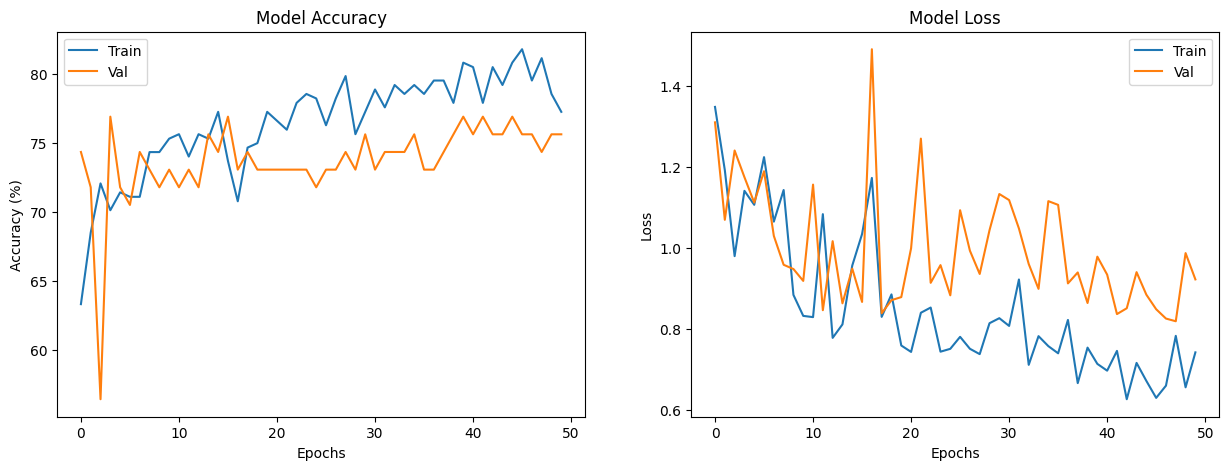

In [ ]:

### Visualizing model performance

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plotting training and validation accuracy
ax[0].plot(train_accuracies, label='Train')
ax[0].plot(val_accuracies, label='Val')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy (%)')
ax[0].legend()

# Plotting training and validation loss
ax[1].plot(train_losses, label='Train')
ax[1].plot(val_losses, label='Val')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

plt.show()

## D. Evaluating Your Trained Model

#

## D. Evaluating Your Trained Model

### Load Trained Model and Evaluate

In [ ]:
## Load Trained Model and Evaluate

# Load the trained weights
model.load_state_dict(torch.load('model_classification.pth'))
# Set the model to evaluation mode
model.eval()

test_correct = 0
test_total = 0

with torch.no_grad():
    for images, labels in val_loader:
        images = images.cuda()
        # 同樣，不需除以 255.
        labels = labels.cuda()
        labels = labels.long()

        outputs = model(images)

        predicted = outputs.argmax(dim=-1)
        print(predicted)
        print(labels)
        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)

print(f'Test accuracy is {100. * test_correct / test_total:.2f}%')


tensor([2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 3], device='cuda:0')
tensor([2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 3, 2, 2, 3, 1, 4, 5, 0, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 5, 4], device='cuda:0')
tensor([5, 3, 2, 2, 2, 2, 2, 2, 0, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
        2, 2, 5, 2, 2, 3, 2, 2], device='cuda:0')
tensor([5, 5, 2, 2, 2, 2, 2, 2, 1, 2, 4, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
        5, 2, 5, 2, 2, 1, 2, 2], device='cuda:0')
tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2], device='cuda:0')
tensor([2, 0, 5, 5, 2, 2, 3, 2, 2, 2, 2, 3, 2, 1], device='cuda:0')
Test accuracy is 76.92%
